In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:\\Users\eslam\\Downloads\\Sleep_health_and_lifestyle_dataset.csv')

print(df.shape)
print(df.columns)
df.head()

# Output shows 374 rows, 15 columns

df.info() 

# Output shows no null values, mixed data types

df.describe()

# Output shows statistical summary of numeric columns

(316, 13)
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                316 non-null    int64  
 1   Gender                   316 non-null    object 
 2   Age                      316 non-null    int64  
 3   Occupation               316 non-null    object 
 4   Sleep Duration           316 non-null    float64
 5   Quality of Sleep         316 non-null    int64  
 6   Physical Activity Level  316 non-null    int64  
 7   Stress Level             316 non-null    int64  
 8   BMI Category             316 non-null    object 
 9   Blood Pressure           316 

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,163.272152,40.237342,7.023418,7.151899,60.696203,5.556962,70.518987,6890.822785
std,99.953999,7.989914,0.703611,1.116555,19.469703,1.646521,4.042978,1521.448126
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,79.750000,33.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,158.500000,39.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,237.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


C:\Users\eslam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eslam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


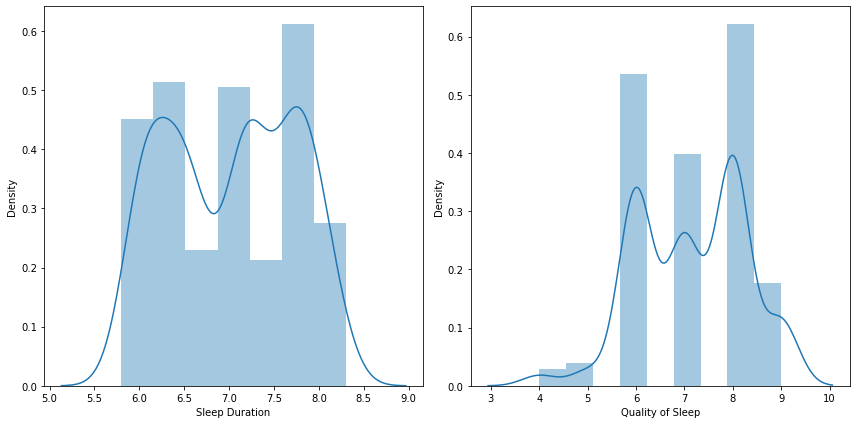

In [3]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['Sleep Duration'])

plt.subplot(1,2,2)
sns.distplot(df['Quality of Sleep'])

plt.tight_layout()
plt.show()

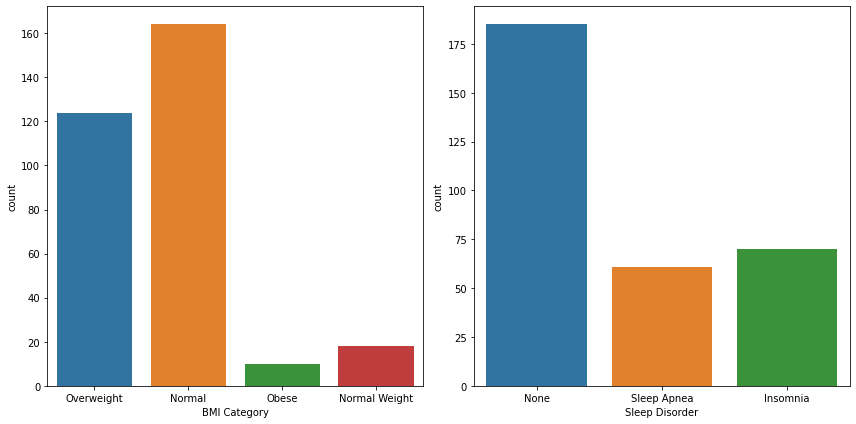

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x='BMI Category', data=df)

plt.subplot(1,2,2)
sns.countplot(x='Sleep Disorder', data=df)

plt.tight_layout()
plt.show()

In [5]:
Q1 = df['Daily Steps'].quantile(0.25)
Q3 = df['Daily Steps'].quantile(0.75)
IQR = Q3 - Q1 

df = df[(df['Daily Steps'] >= Q1 - 1.5 * IQR) & (df['Daily Steps'] <= Q3 + 1.5 *IQR)]

In [6]:
# Encode categorical features
le = LabelEncoder()
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])



df.head()



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2


In [7]:
df.drop_duplicates(inplace=True)


df.drop(['Person ID'], axis=1, inplace=True)

df.fillna(method='ffill', inplace=True)


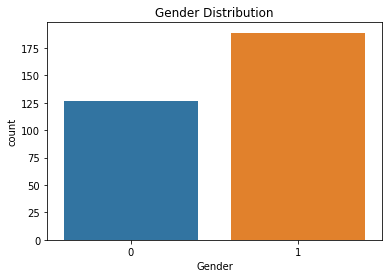

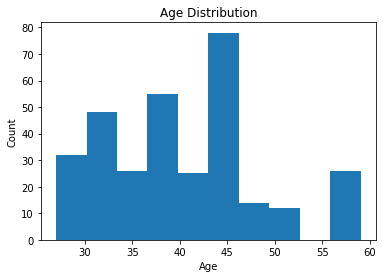

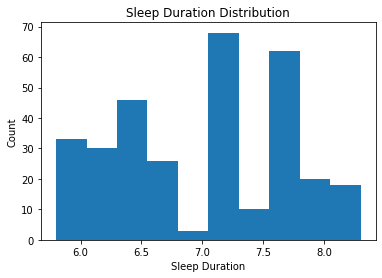

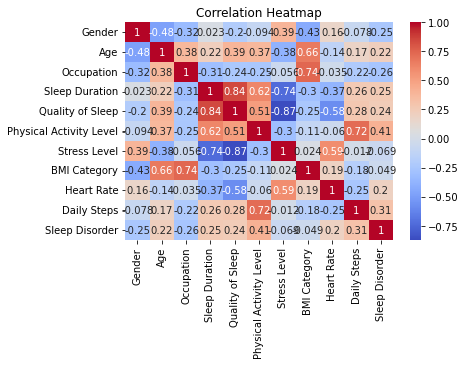

In [8]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


plt.hist(df['Sleep Duration'], bins=10)
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.title('Sleep Duration Distribution')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


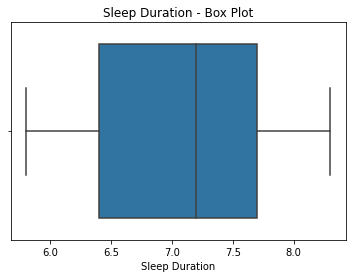

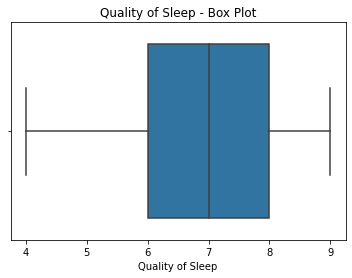

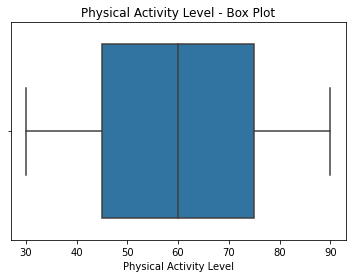

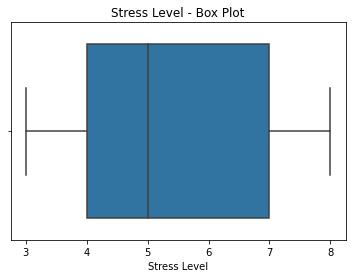

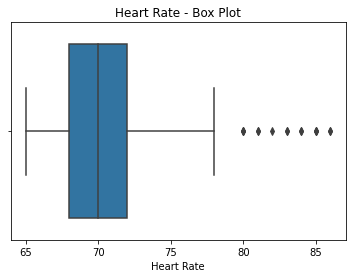

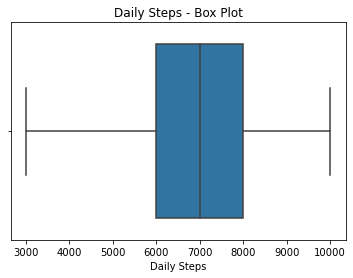

In [9]:
numerical_cols = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col + ' - Box Plot')
plt.show()
from scipy import stats

z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = df[filtered_entries]


In [11]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 15],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

rf_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'], 
                                 criterion=best_params['criterion'])

rf_best.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_pred = rf_best.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.show()

plt.plot(rf_best.oob_score_, label='OOB Error')
plt.legend()
plt.xlabel('Trees')
plt.title('OOB Error vs Number of Trees')
plt.show()